# Hash functions and multiplanes

In [34]:
import numpy as np
import pprint
from utils_nb import plot_vectors
import matplotlib.pyplot as plt
import math

pp = pprint.PrettyPrinter(indent=4)

# Basic Hash Tables

In [5]:
def basic_hash_table(values_l, nr_buckets):
    def hash_function(value, nr_buckets=nr_buckets):
        return value % nr_buckets

    hash_table = {i: [] for i in range(0, nr_buckets)}

    for value in values_l:
        hash = hash_function(value)
        hash_table[hash].append(value)

In [21]:
values_l = [100, 10, 14, 15, 17, 97, 128]

hash_table = basic_hash_table(values_l, 10)

pp.pprint(hash_table)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [15],
    6: [],
    7: [17, 97],
    8: [128],
    9: []}


# Planes

Multiplanes hash functions are other types of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes. In the following code, we show the most basic forms of the multiplanes principle. First, with a single plane:

## Define the plane

(1, 2)


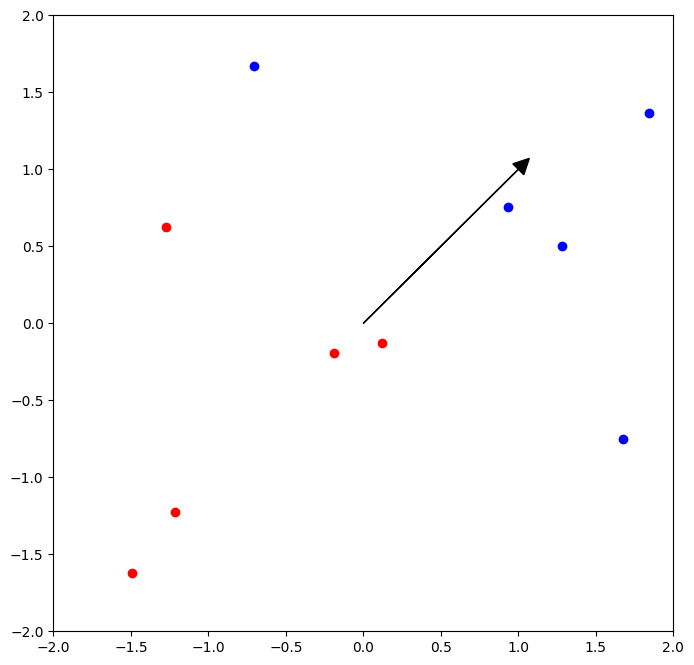

In [33]:
P = np.array([[1, 1]])
print(P.shape)

fig, ax1 = plt.subplots(figsize=(8, 8))

plot_vectors([P], axes=[2, 2], ax=ax1)

# Plot random points

for i in range(0, 10):
    v1 = np.array(np.random.uniform(-2, 2, 2))
    # P -> (1, 2)
    # v1 -> (2,)
    # v1.T -> (, 2) -> (2,)
    side_of_plane = np.sign(np.dot(P, v1.T))
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], "bo")
    else:
        ax1.plot([v1[0]], [v1[1]], "ro")

plt.show()

The first thing to note is that the vector that defines the plane does not mark the boundary between the two sides of the plane. It marks the direction in which you find the 'positive' side of the plane. Not intuitive at all!

If we want to plot the separation plane, we need to plot a line that is perpendicular to our vector `P`. We can get such a line using a $90^o$ rotation matrix.

Feel free to change the direction of the plane `P`.

(1, 2)
(2, 2)


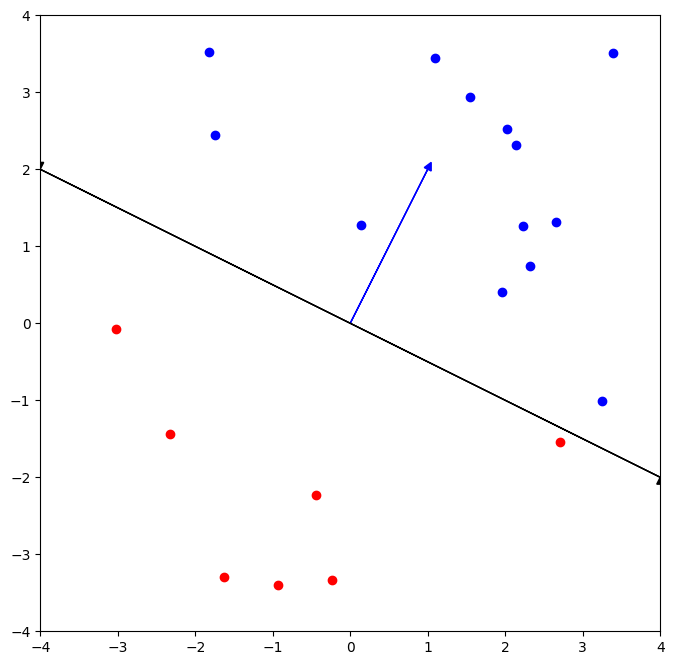

In [47]:
P = np.array([[1, 2]])
print(P.shape)

# Get a new plane perpendiculat to P - Use rotation matrix

angle = math.pi / 2

R = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])

print(R.shape)
PT = R @ P.T  # (according to formula and that it should be row vector)

fig, ax1 = plt.subplots(figsize=(8, 8))  # Create a plot with custom size

plot_vectors([P], colors=["b"], axes=[2, 2], ax=ax1)  # Plot the plane P as a vector

# Plot the plane P as a 2 vectors.
# We scale by 2 just to get the arrows outside the current box
plot_vectors([PT * 2, -PT * 2], colors=["k", "k"], axes=[4, 4], ax=ax1)

# Plot 20 random points.
for i in range(0, 20):
    v1 = np.array(
        np.random.uniform(-4, 4, 2)
    )  # Get a pair of random numbers between -4 and 4
    side_of_plane = np.sign(np.dot(P, v1.T))  # Get the sign of the dot product with P
    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], "bo")  # Plot a blue point
    else:
        ax1.plot([v1[0]], [v1[1]], "ro")  # Plot a red point

plt.show()

In [48]:
P = np.array([[1, 1]])  # Single plane
v1 = np.array([[1, 2]])  # Sample point 1
v2 = np.array([[-1, 1]])  # Sample point 2
v3 = np.array([[-2, -1]])  # Sample point 3

In [50]:
np.dot(P, v1.T)

array([[3]])

In [51]:
np.dot(P, v2.T)

array([[0]])

In [52]:
np.dot(P, v3.T)

array([[-3]])

In [67]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T)  # Get the dot product P * v'
    sign_of_dot_product = np.sign(
        dotproduct
    )  # The sign of the elements of the dotproduct matrix
    # print(sign_of_dot_product)
    sign_of_dot_product_scalar = (
        sign_of_dot_product.item()
    )  # The value of the first item
    return sign_of_dot_product_scalar

In [68]:
print(side_of_plane(P, v1))  # In which side is [1, 2]

1


# Hash functions with multiple planes

In [69]:
P1 = np.array([[1, 1]])
P2 = np.array([[-1, 1]])
P3 = np.array([[-1, -1]])
P_l = [P1, P2, P3]
v = np.array([[2, 2]])

The next function creates a hash value based on a set of planes. The output value is a combination of the side of the plane where the vector is localized with respect to the collection of planes.

We can think of this list of planes as a set of basic hash functions, each of which can produce only 1 or 0 as output.

In [70]:
def hash_multi_plane(P_l, v):
    hash_value = 0

    for index, P in enumerate(P_l):
        sign = side_of_plane(P, v)
        h_i = 1 if sign >= 0 else 0
        hash_value += 2**index * h_i

    return hash_value

In [71]:
hash_multi_plane(P_l, v)

3

# Random planes

Lets create three set of random planes

In [85]:
np.random.seed(0)
num_dimensions = 2
num_planes = 3
random_planes_matrix = np.random.normal(size=(num_planes, num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [86]:
v = np.array([[2, 2]])

In [87]:
def side_of_plane_matrix(P, v):
    # P.shape -> (3, 2)
    # v.shape -> (1, 2)
    # v needs to be a column if P * v -> P * v.T
    # dot -> [3, 2] x [2, 1] -> [3, 1]
    dot = P @ v.T
    sign_of_dot = np.sign(dot)
    return sign_of_dot

In [88]:
sides_l = side_of_plane_matrix(random_planes_matrix, v)
sides_l

array([[1.],
       [1.],
       [1.]])

In [93]:
def hash_multi_plane_matrix(P, v, num_planes):
    hash_value = 0
    sides = side_of_plane_matrix(P, v)

    for index in range(num_planes):
        h_i = 1 if sides[index].item() >= 0 else 0
        # sides[index] = [[x]]
        # [[x]].item() -> x
        hash_value += 2**index * h_i

    return hash_value

In [94]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

#### Note
This showed you how to make one set of random planes.  You will make multiple sets of random planes in order to make the approximate nearest neighbors more accurate.

# Document vectors

In [96]:
word_embedding = {
    "I": np.array([1, 0, 1]),
    "love": np.array([-1, 0, 1]),
    "learning": np.array([1, 0, 1]),
}
words_in_document = ["I", "love", "learning", "not_a_word"]

document_embedding = np.array([0, 0, 0])
for word in words_in_document:
    document_embedding += word_embedding.get(word, 0)

In [97]:
print(document_embedding)

[[1 0 3]]
